In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/binarPlatinumTeam1/dataset

Mounted at /content/drive
/content/drive/MyDrive/binarPlatinumTeam1/dataset


In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras import regularizers

In [ ]:
import pandas as pd
df = pd.read_csv("train_preprocess.tsv", sep='\t', names=['text','label'], encoding="utf-8")
df

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [ ]:
import re
!pip install unidecode
!pip install flashtext
from unidecode import unidecode
from flashtext import KeywordProcessor 
import json

f = open('kamus_alay_11.json')
alay_dict = json.load(f)
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_dict(alay_dict)

def _toLower(s): return s.lower()

def _remove_punct(s): 
    s = re.sub('[()!?]', ' ', s)
    s = re.sub('\[.*?\]',' ', s)
    s = re.sub(r"[^\w\d\s]+", "", s)
    s = re.sub(r"[^a-z0-9]"," ", s)
    return s

def _remove_space(s): 
    s = re.sub(' +', ' ', s)
    s = s.strip()
    return s

def _remove_link(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub(r"www.\S+", "", s)
    return s

def _remove_hastag(s):
    s = re.sub("@[A-Za-z0-9_]+","", s)
    s = re.sub("#[A-Za-z0-9_]+","", s)
    return s

def _remove_another_text(s):
    s = re.sub(r"rt", "", s)
    s = re.sub(r"user", "", s)
    s = re.sub(r'[^\x00-\x7f]',r'', s)
    return s

def _remove_another_file(s): 
    s = re.sub(r"rt", "", s)
    s = re.sub(r"user", "", s)
    return re.sub(r"\\x[A-Za-z0-9./]+", "", unidecode(s))

#Replace slang words
def _normalization(s):
    return keyword_processor.replace_keywords(s)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def file_processing(df):
    df['text'] = df['text'].apply(_toLower)
    df['text'] = df['text'].apply(_remove_link)
    df['text'] = df['text'].apply(_remove_another_file)
    df['text'] = df['text'].apply(_remove_hastag)
    df['text'] = df['text'].apply(_remove_punct)
    df['text'] = df['text'].apply(_normalization)
    df['text'] = df['text'].apply(_remove_space)
    df['text'].to_csv('output.csv', index=False, header=False)
    df[['text']].to_csv('output2.csv', index=False, header=False)
    return df
df = file_processing(df)

In [ ]:
from gensim.models import FastText
import os
import pandas as pd
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
!pip install luwiji
from luwiji.word_vector import illustration
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sentences = [word_tokenize(text.lower()) for text in tqdm(df.text)]
sentences[:5]

  0%|          | 0/11000 [00:00<?, ?it/s]

[['warung',
  'ini',
  'dimiliki',
  'oleh',
  'pengusaha',
  'pabrik',
  'tahu',
  'yang',
  'sudah',
  'puluhan',
  'tahun',
  'terkenal',
  'membuat',
  'tahu',
  'putih',
  'di',
  'bandung',
  'tahu',
  'berkualitas',
  'dipadu',
  'keahlian',
  'memasak',
  'dipadu',
  'kretivitas',
  'jadilah',
  'warung',
  'yang',
  'menyajikan',
  'menu',
  'utama',
  'berbahan',
  'tahu',
  'ditambah',
  'menu',
  'umum',
  'lain',
  'sepei',
  'ayam',
  'semuanya',
  'selera',
  'indonesia',
  'harga',
  'cukup',
  'terjangkau',
  'jangan',
  'lewatkan',
  'tahu',
  'bletoka',
  'nya',
  'tidak',
  'kalah',
  'dengan',
  'yang',
  'asli',
  'dari',
  'tegal'],
 ['mohon',
  'ulama',
  'lurus',
  'dan',
  'k212',
  'mmbri',
  'hujjah',
  'paai',
  'apa',
  'yang',
  'harus',
  'diwlh',
  'agar',
  'suara',
  'islam',
  'tidak',
  'pecahpecah'],
 ['lokasi',
  'strategis',
  'di',
  'jalan',
  'sumatera',
  'bandung',
  'tempat',
  'nya',
  'nyaman',
  'terutama',
  'sofa',
  'di',
  'lantai',


In [ ]:
modelft = FastText(sentences, size=128, window=3, min_count=1, iter=10, sg=0)

In [ ]:
modelft.save("sentimen_review.fasttext")

In [ ]:
modelft = FastText.load("sentimen_review.fasttext")

In [ ]:
# contoh_data = [
#     ['aplikasinya','ok','kok',',','sangat','membantu','untuk','keseharian','saya'],
#     ['aplikasinya','gak','nyaman','dipakai','oleh','laki']
# ]

In [ ]:
# modelft.train(contoh_data, total_examples=len(contoh_data), epochs=100)

Exception in thread Thread-5063:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.8/dist-packages/gensim/models/base_any2vec.py", line 211, in _worker_loop
    tally, raw_tally = self._do_train_job(data_iterable, job_parameters, thread_private_mem)
  File "/usr/local/lib/python3.8/dist-packages/gensim/models/fasttext.py", line 595, in _do_train_job
    tally += train_batch_cbow(self, sentences, alpha, work, neu1)
  File "gensim/models/fasttext_inner.pyx", line 431, in gensim.models.fasttext_inner.train_batch_cbow
TypeError: 'NoneType' object is not subscriptable


KeyboardInterrupt: ignored

In [ ]:
# modelft.save("sentimen_review.fasttext")

In [ ]:
w2v = modelft.wv

In [ ]:
w2v.index2word

['nya',
 'yang',
 'dan',
 'di',
 'tidak',
 'saya',
 'dengan',
 'ini',
 'makanan',
 'tempat',
 'enak',
 'untuk',
 'makan',
 'juga',
 'ke',
 'ada',
 'sangat',
 'harga',
 'dari',
 'sini',
 'bandung',
 'menu',
 'karena',
 'banyak',
 'cukup',
 'banget',
 'bisa',
 'tapi',
 'kalau',
 'saja',
 'sudah',
 'restoran',
 'itu',
 'rasa',
 'kami',
 'rasanya',
 'jadi',
 'suasana',
 'nyaman',
 'buat',
 'malam',
 'sekali',
 'adalah',
 'pelayanan',
 'ayam',
 'kita',
 'goreng',
 'sama',
 'pemandangan',
 'jalan',
 'bagus',
 'nasi',
 'suka',
 'sepei',
 'lebih',
 'lagi',
 'datang',
 'sih',
 'orang',
 'mahal',
 'satu',
 'atau',
 'ya',
 'lumayan',
 'hanya',
 'pilihan',
 'cocok',
 'keluarga',
 'biasa',
 'sampai',
 'saat',
 'kota',
 'pas',
 'lokasi',
 'memang',
 'hari',
 'mau',
 'resto',
 'pun',
 'terlalu',
 'masih',
 'anda',
 'baik',
 'harus',
 'pada',
 'pesan',
 'porsi',
 'dalam',
 'salah',
 'agak',
 'steak',
 'kurang',
 'tetapi',
 'semua',
 'akan',
 'sunda',
 'selalu',
 'kali',
 'deh',
 'minuman',
 'khas',
 '

In [ ]:
w2v.vector_size

128

In [ ]:
w2v["halo"]

array([ 1.04525071e-02, -1.88508213e-01, -1.72147322e-02, -2.29608446e-01,
       -2.32943863e-01, -3.87419492e-01, -1.48945712e-02, -1.85110077e-01,
        2.89944053e-01,  2.89748237e-02, -1.78459898e-01,  1.59302726e-01,
       -2.47117773e-01, -3.98443401e-01, -4.22134846e-02,  4.14738387e-01,
       -5.26961684e-01, -1.85381502e-01, -6.70719892e-02,  7.88785797e-03,
        1.42609365e-02, -3.32759410e-01,  8.05794075e-02,  2.98983679e-04,
        2.07047939e-01,  1.28610373e-01,  3.75594586e-01, -2.61348248e-01,
        1.04533024e-01, -7.18162209e-02, -1.36573330e-01, -1.34959444e-01,
        2.19744459e-01, -1.33142695e-01, -2.63051331e-01,  3.20480585e-01,
       -1.63940802e-01,  7.90060032e-03, -2.87819177e-01,  1.41918268e-02,
        1.26210749e-01,  9.18243546e-03,  1.25440985e-01, -1.17151208e-01,
        2.35710755e-01, -2.65722603e-01,  2.94952244e-01,  4.15394269e-02,
       -7.08855987e-01, -1.48411855e-01, -2.32334837e-01,  2.08309233e-01,
        2.58413907e-02, -

In [ ]:
w2v.similar_by_word('makanan', topn=5)

[('makananmakanan', 0.9978458285331726),
 ('makananan', 0.994428277015686),
 ('makanana', 0.9718172550201416),
 ('makannan', 0.95969557762146),
 ('makaanan', 0.9481216669082642)]

In [ ]:
!pip install umap-learn
import umap.umap_ as umap
import numpy as np
import pandas as pd
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
reducer = umap.UMAP()
reducer = reducer.fit_transform(modelft.wv.vectors)

In [ ]:
df_vector = pd.DataFrame(reducer, columns=['umap1','umap2'])
df_vector['text'] = w2v.index2word
print(df_vector['text'])

0                nya
1               yang
2                dan
3                 di
4              tidak
            ...     
17653         teaser
17654        ajiibbb
17655           jala
17656    kemandirian
17657       foodlife
Name: text, Length: 17658, dtype: object


In [ ]:
fig = px.scatter(df_vector, x='umap1', y='umap2', text='text')
fig.update_traces(textposition='top center')
fig.update_layout(
    height = 800,
    title_text = 'Reduced FastText Visualization'
)
fig.show()

In [ ]:
vocab=modelft.wv.vocab
print("The total number of words are : ",len(vocab))

The total number of words are :  17658


In [ ]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=modelft.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict))

The no of key-value pairs :  17658


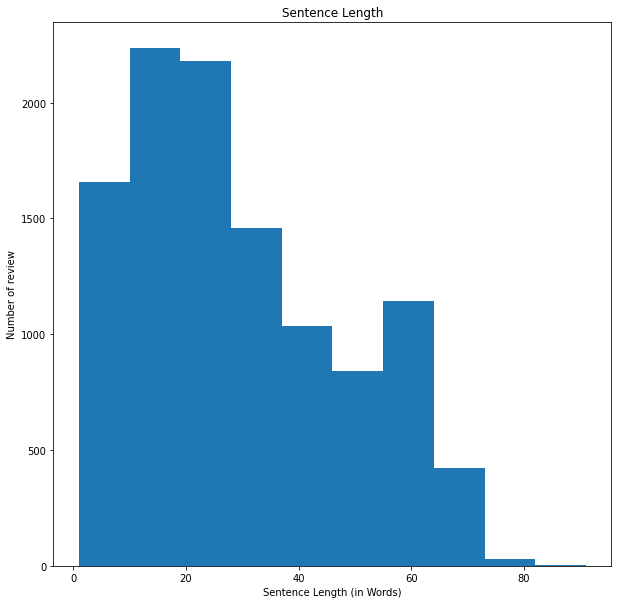

In [ ]:
import matplotlib.pyplot as plt
sentence_length = [len(tokens) for tokens in sentences]
vocab = sorted(list([word for tokens in sentences for word in tokens]))

plt.figure(figsize = (10,10))
plt.xlabel('Sentence Length (in Words)')
plt.ylabel('Number of review')
plt.title('Sentence Length')
plt.hist(sentence_length)
plt.show()

In [ ]:
print(len(vocab))

318970


In [ ]:
tokenizer = Tokenizer(num_words=17658)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X)
X[:5]
print(tokenizer.word_index)
word_index = tokenizer.word_index

maxLen=0
for string in X:
    temp=len(string)
    if temp>maxLen:
        maxLen=temp

print ('Maximum sequence length:',maxLen)
#word_index = list(tokenizer.word_index)
#words = pd.DataFrame(word_index)
#words.head()
#words.to_csv('kumpulan_kata_token.csv')

{'nya': 1, 'yang': 2, 'dan': 3, 'di': 4, 'tidak': 5, 'saya': 6, 'dengan': 7, 'ini': 8, 'makanan': 9, 'tempat': 10, 'enak': 11, 'untuk': 12, 'makan': 13, 'juga': 14, 'ke': 15, 'ada': 16, 'sangat': 17, 'harga': 18, 'dari': 19, 'sini': 20, 'bandung': 21, 'menu': 22, 'karena': 23, 'banyak': 24, 'cukup': 25, 'banget': 26, 'bisa': 27, 'tapi': 28, 'kalau': 29, 'saja': 30, 'sudah': 31, 'restoran': 32, 'itu': 33, 'rasa': 34, 'kami': 35, 'rasanya': 36, 'jadi': 37, 'suasana': 38, 'nyaman': 39, 'buat': 40, 'malam': 41, 'sekali': 42, 'adalah': 43, 'pelayanan': 44, 'ayam': 45, 'kita': 46, 'goreng': 47, 'sama': 48, 'pemandangan': 49, 'jalan': 50, 'bagus': 51, 'nasi': 52, 'suka': 53, 'sepei': 54, 'lebih': 55, 'lagi': 56, 'datang': 57, 'sih': 58, 'orang': 59, 'mahal': 60, 'satu': 61, 'atau': 62, 'ya': 63, 'lumayan': 64, 'hanya': 65, 'pilihan': 66, 'cocok': 67, 'keluarga': 68, 'biasa': 69, 'sampai': 70, 'saat': 71, 'kota': 72, 'pas': 73, 'lokasi': 74, 'memang': 75, 'hari': 76, 'mau': 77, 'resto': 78, 'p

In [ ]:
import pickle

# saving
with open('tokenizer_fasttext2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42, k_neighbors=5)
X_res_SMOTE, y_res_SMOTE = oversample.fit_resample(X, df['label'])

In [ ]:
X_res_SMOTE

array([[   0,    0,    0, ...,  448,   19, 8897],
       [   0,    0,    0, ...,  358,    5, 8902],
       [   0,    0,    0, ...,    1,   14,  456],
       ...,
       [   0,    0,    0, ..., 2087, 1179,  692],
       [   0,    0,    0, ...,  154, 3275,  650],
       [   0,    0,    0, ..., 1484, 6000, 6001]], dtype=int32)

In [ ]:
from collections import Counter
print('Original dataset shape %s' % Counter(df.label))
print('SMOTE dataset shape %s' % Counter(y_res_SMOTE))

Original dataset shape Counter({'positive': 6416, 'negative': 3436, 'neutral': 1148})
SMOTE dataset shape Counter({'positive': 6416, 'neutral': 6416, 'negative': 6416})


In [ ]:
# Function to create weight matrix from word2vec gensim model
EMBEDDING_DIM = 128
vocab = 17658
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(modelft, word_index)

<ipython-input-145-4e4f4ab7bfa1>:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [ ]:
embedding_vectors.shape

(17652, 128)

In [ ]:
y = pd.get_dummies(df['label']).values
[print(df['label'][i], y[i]) for i in range(0,5)]

positive [0 0 1]
neutral [0 1 0]
positive [0 0 1]
positive [0 0 1]
negative [1 0 0]


[None, None, None, None, None]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7370, 91)
(3630, 91)
(7370, 3)
(3630, 3)


In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, Y_train)
# # print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
model = Sequential()
model.add(Embedding(vocab-6, output_dim=EMBEDDING_DIM, input_length=91, weights=[embedding_vectors], trainable=False))
model.add(LSTM(50, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

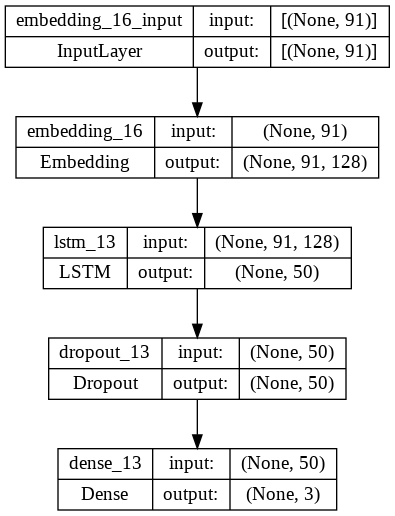

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# model = Sequential()
# model.add(Embedding(vocab-6, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=91, trainable=False))
# model.add(LSTM(128))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax')) 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
93/93 [==============================] - 15s 136ms/step - loss: 1.4746 - accuracy: 0.7514 - val_loss: 0.9298 - val_accuracy: 0.8012
Epoch 2/20
93/93 [==============================] - 15s 162ms/step - loss: 0.7528 - accuracy: 0.8141 - val_loss: 0.6423 - val_accuracy: 0.8148
Epoch 3/20
93/93 [==============================] - 10s 103ms/step - loss: 0.5934 - accuracy: 0.8217 - val_loss: 0.5574 - val_accuracy: 0.8277
Epoch 4/20
93/93 [==============================] - 9s 95ms/step - loss: 0.5345 - accuracy: 0.8285 - val_loss: 0.5394 - val_accuracy: 0.8189
Epoch 5/20
93/93 [==============================] - 10s 107ms/step - loss: 0.5110 - accuracy: 0.8263 - val_loss: 0.5077 - val_accuracy: 0.8345
Epoch 6/20
93/93 [==============================] - 9s 97ms/step - loss: 0.4917 - accuracy: 0.8304 - val_loss: 0.5107 - val_accuracy: 0.8223
Epoch 7/20
93/93 [==============================] - 12s 131ms/step - loss: 0.4936 - accuracy: 0.8277 - val_loss: 0.4840 - val_accuracy: 0.8304
Epo

In [ ]:
model.save('lstmModel_fasttext2.h5')
print('Model Saved!')

Model Saved!


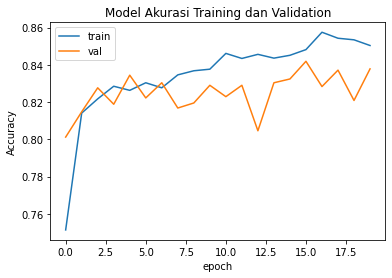

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Akurasi Training dan Validation')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

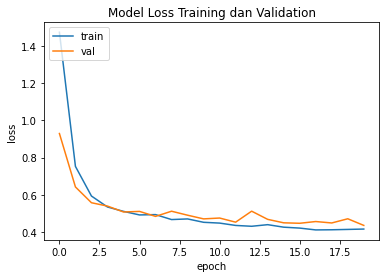

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Training dan Validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [ ]:
score, acc = model.evaluate(X_test, Y_test, batch_size=64)
print("Test score: ", score)
print("Test accuracy: ", acc)

57/57 [==============================] - 3s 61ms/step - loss: 0.4507 - accuracy: 0.8320
Test score:  0.45067107677459717
Test accuracy:  0.8319559097290039


In [ ]:
Y_predict = []
for x in X_test:
  x = np.reshape(x, (1,91))
  result = model.predict(x, batch_size=1, verbose=2)[0]
  if(np.argmax(result) == 0):
    Y_predict.append(0)
  elif (np.argmax(result) == 1):
    Y_predict.append(1)
  elif (np.argmax(result) == 2):
    Y_predict.append(2)

Y_predict

1/1 - 1s - 767ms/epoch - 767ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 34ms/epoch - 34ms/step
1/1 - 0s - 42ms/epoch - 42ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 30ms/epoch - 30ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 45ms/epoch - 45ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 25ms/epoch - 25ms/step
1/1 - 0s - 22ms/epoch - 22ms/step
1/1 - 0s - 21ms/epoch - 21ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 2

[2,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,


In [ ]:
Y_predict = model.predict(X_test)

114/114 [==============================] - 3s 17ms/step


In [ ]:
from sklearn import metrics
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), Y_predict.argmax(axis=1))

In [ ]:
print(metrics.classification_report(Y_test.argmax(axis=1), Y_predict.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1137
           1       0.75      0.70      0.72       380
           2       0.91      0.87      0.89      2113

    accuracy                           0.83      3630
   macro avg       0.80      0.79      0.79      3630
weighted avg       0.84      0.83      0.83      3630



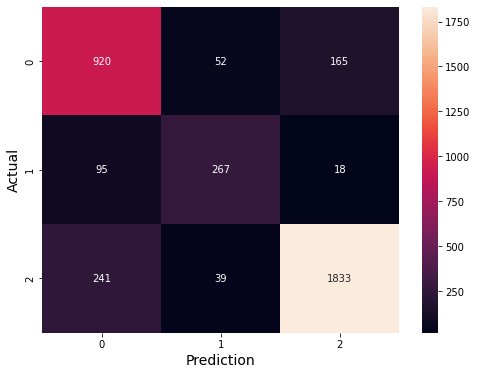

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = Y_test.argmax(axis=1), y_pred = Y_predict.argmax(axis=1)), fmt='g', annot=True)
#ax.axis.set_label_posistion('top')
#ax.axis.set_ticks_posistion('top')
ax.set_xlabel('Prediction', fontsize = 14)
# ax.set_xticklabels(['negatif (0)', 'positif (1)'])
ax.set_ylabel('Actual', fontsize = 14)
# ax.set_yticklabels(['negatif (0)', 'positif (1)'])
plt.show()

In [ ]:
# pos_cnt, neg_cnt, net_cnt, pos_correct, neg_correct, net_correct = 0, 0, 0, 0, 0, 0
# for x in range(len(X_validate)):
    
#     result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
#     if np.argmax(result) == np.argmax(Y_validate[x]):
#         if np.argmax(Y_validate[x]) == 0:
#             neg_correct += 1
#         else:
#             pos_correct += 1
       
#     if np.argmax(Y_validate[x]) == 0:
#         neg_cnt += 1
#     else:
#         pos_cnt += 1



# print("pos_acc", pos_correct/pos_cnt*100, "%")
# print("neg_acc", neg_correct/neg_cnt*100, "%")